<a href="https://colab.research.google.com/github/ispineda/Bedu-Santander/blob/main/Python-Analytics/F3_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos con python

## Sesión 1. Estimadores de Locación y Variabilidad


### Ejemplo 1: Estimados de Locación

1. Objetivos:
    - Aprender a calcular estimados de locación utilizando `pandas`.
---
    
2. Desarrollo:

Vamos a utilizar un primer dataset para aprender a calcular estimados de locación usando `pandas`.

El dataset que usaremos en esta sesión contiene información acerca de propiedades que estuvieron (o están) en venta en la ciudad de Melbourne, Australia. El dataset contiene las características físicas de la propiedad, su locación, el tipo de vivienda que es y el precio de la propiedad.

Vamos a analizar la variable precio para entender cómo están distribuidos los precios de propiedades en esta ciudad.

In [5]:
import pandas as pd
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/melbourne_housing-clean.csv')

In [7]:
df.head()

,Unnamed: 0,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**La media o promedio**

La media o promedio se obtiene sumando todos los valores de un conjunto de datos numéricos y dividiéndolos entre la cantidad de valores que tenemos en nuestro conjunto.

Vamos a analizar la columna `price`. Veamos cuál es el "valor típico" obtenido usando la media (promedio):

In [8]:
df['price'].mean()

1068141.895071269

**La mediana**

La mediana se obtiene de la siguiente manera:

1. Primero ordenamos de manera ascendente nuestros datos
2. Luego tomamos el valor que está justo en medio de nuestra secuencia ordenada de valores.
3. Si nuestro conjunto tiene un número par de valores y por lo tanto no tiene un valor justo a la mitad de la secuencia, se toma el promedio de los dos valores que se encuentran a la mitad de la secuencia.

Ahora veamos el "valor típico" obtenido usando la mediana:

In [9]:
df['price'].median()

895500.0

Hemos obtenido valores distintos. Más adelante vamos a aprender qué significa esto y cómo podemos determinar si esta diferencia es relevante o no.

### Ejemplo 2: Media Truncada

1. Objetivos:
    - Aprender a estimar la media truncada usando scipy.
 
---
    
2. Desarrollo:

La media truncada es un estimado de locación más *robusto* que el promedio y la mediana. Esto significa que es menos sensible a valores atípicos. La media truncada se obtiene de la siguiente manera:

1. Primero ordenamos nuestro conjunto de manera ascendente.
2. Después decidimos qué porcentaje de nuestros datos vamos a truncar. Los valores más comunes suelen variar entre 5% y 25%.
3. Divide el porcentaje acordado entre dos y elimina esa fracción de tus datos del inicio y del final de tu secuencia. Por ejemplo, si decides truncar un 5%, elimina el 2.5% de tus datos del inicio de tu secuencia y el otro 2.5% del final de tu secuencia.
4. Obtén el promedio de los valores restantes.

Afortunadamente, no tenemos que hacer esto manualmente. La librería `scipy` ya ofrece un método para obtener la media truncada fácilmente:

In [10]:
from scipy import stats

In [11]:
print(f"Media: {df['price'].mean()}")
print(f"Mediana: {df['price'].median()}")
print(f"Media Truncada: {stats.trim_mean(df['price'], 0.1)}")

Media: 1068141.895071269
Mediana: 895500.0
Media Truncada: 973653.7960935823


### Ejemplo 3: Desviación Estándar

1. Objetivos:
    - Aprender cómo se calcula la desviación estándar
    - Aprender a usar `pandas` para calcularla
 
---
    
2. Desarrollo:

Para obtener la desviación estándar se llevan a cabo los siguientes pasos:

1. Primero se obtiene el promedio de nuestros datos.
2. Después sacamos todas las diferencias entre cada valor de nuesrto conjunto y nuestro valor típico.
3. Después elevamos todos los resultados al cuadrado.
4. Luego se suman todos estos valores.
5. Luego se dividen entre la cantidad de valores - 1.
6. Finalmente se saca la raíz cuadrada del valor resultante.

`pandas` tiene un método con el que podemos calcular la desviación estándar rápidamente:

In [12]:
df['price'].std()

643728.1914372866

### Ejemplo 4: Estadísticos de Orden

1. Objetivos:
    - Aprender a calcular el rango y los percentiles usando pandas
 
---
    
2. Desarrollo:

**Rango**

El rango es simplemente la diferencia entre el valor máximo de un conjunto y el valor mínimo de un conjunto. Por lo tanto, podemos obtenerla de esta manera:

In [13]:
max = df['price'].max()
min = df['price'].min()
print(f"El rango es max - min:= {max}-{min} = {max-min}")

El rango es max - min:= 9000000.0-85000.0 = 8915000.0


**Percentiles**

El percentil `P` es un valor que indica que por lo menos `P%` de los valores en el conjunto tienen este valor o un valor menor; mientras que `(100-P)%` de los valores tienen este valor o un valor mayor. Por ejemplo, para obtener el percentil 80 primero ordenamos nuestro conjunto de manera ascendente y después elegimos un valor de manera que el 80% de los valores en nuestro conjunto sean iguales o menores a ese valor.

En `pandas`, los percentiles están implementados como cuantiles, que es lo mismo que los percentiles pero en versión fracciones. Es decir, el percentil 80 es lo  mismo que el cuantil 0.8.

In [14]:
df['price'].quantile(0.8)

1440000.0

En este caso, el 80% de los valores en nuestro conjunto de datos tienen un valor menor o igual a 1 440 000.

Como podrás ya haber imaginado, el valor mínimo equivale al percentil 0 y el valor máximo equivale al percentil 100, mientras que la mediana es exactamente igual que el percentil 50.

Sacando los percentiles podemos darnos una idea más o menos precisa de cómo están distribuidos nuestros datos.

Por ejemplo:

In [ ]:
print(f'Valor mínimo: {df["price"].min()}')
print(f'Percentil 10: {df["price"].quantile(0.1)}')
print(f'Percentil 25: {df["price"].quantile(0.25)}')
print(f'Percentil 50: {df["price"].median()}')
print(f'Percentil 75: {df["price"].quantile(0.75)}')
print(f'Percentil 90: {df["price"].quantile(0.9)}')
print(f'Valor máximo: {df["price"].max()}')

Valor mínimo: 85000.0
Percentil 10: 470000.0
Percentil 25: 640000.0
Percentil 50: 895500.0
Percentil 75: 1325000.0
Percentil 90: 1850000.0
Valor máximo: 9000000.0


Viendo estos números podemos inferir varias cosas:

- Casi todos nuestros datos están concentrados en valores menores a 2 000 000.
- Eso quiere decir que tenemos algunos valores atípicos *demasiado* grandes (si los comparamos con el resto de los valores)
- La mediana nos estaba dando un número más cercano al verdadero "valor típico" que el promedio.
- El promedio tenía un sesgo hacia arriba debido a los valores extremadamente grandes.
- El rango entre el valor máximo y mínimo no nos da una medida representativa de qué valores pueden tomar nuestros datos.

**Rango intercuartílico**

Otra medida muy común es lo que llamamos el rango intercuartílico, que es la diferencia entre el percentil 75 y el percentil 25. Este número nos da una idea del rango que tienen los valores más cercanos al valor típico.

En nuestro ejemplo, nuestro rango intercuartílico sería:

In [ ]:
print('IQR:= ',df["price"].quantile(0.75) - df["price"].quantile(0.25))

IQR:=  685000.0


Podemos observar que el rango de los "valores típicos" es muchísimo menor al rango total de nuestros datos.

¡En la próxima sesión vamos a aprender a visualizar estas estadísticas para que las relaciones entre ellas queden mucho más claras!

Entre mayor sea nuestro resultado quiere decir que nuestros datos están más dispersos (es decir, hay muchos datos que se alejan de nuestro valor típico); entre menor sea el resultado quiere decir que nuestros datos están menos dispersos (es decir, están más cerca de nuestro valor típico).

Obviamente hay que tomar en cuenta el rango de nuestros valores para determinar si nuestra desviación estándar es pequeña o grande. Por ejemplo, una desviación estándar de 10 es muy pequeña si nuestros valores tienen un rango de 1 000 000. En cambio, una desviación estándar de 10 es mucho mayor si nuestros valores tienen un rango de 40.

## Retos

### Reto 1: Datos estructurados

1. Objetivos:
    - Aprender a diferenciar los diferentes tipos de datos estructurados que existen.
 
---
    
2. Desarrollo:

In [ ]:
import pandas as pd

**a) Identificando datos estructurados**

A continuación verás varias muestras de datos y sus descripciones. Asígnales una de las categorías de datos estructurados que acabas de aprender. Después, comparte tus hipótesis con la experta y con tus compañeros.

Es muy importante saber identificar tipos de datos estructurados, porque las técnicas y estrategias que aprenderás durante este módulo suelen estar dirigidas hacia un tipo de dato específico. La elección de las mejores herramientas viene después de entender a qué tipo de dato nos estamos enfrentando.

Muestra 1: Extraída de un conjunto de datos que contiene edades de personas

In [ ]:
edades = pd.Series([23, 34, 4, 45, 52, 59, 23, 48, 50, 49, 3, 4, 6, 8, 79, 6, 40, 17, 34, 4, 67, 97, 87, 65, 24, 4, 46])

¿Qué tipo de dato estructurado tenemos en la serie `edades`?

Numerico - Discreto

Muestra 2: Extraída de un conjunto de datos que contiene evaluaciones de restaurantes hechas por usuarios de una app

In [ ]:
evaluaciones = pd.Series([1, 4, 2, 2, 3, 5, 4, 4, 4, 5, 1, 2, 2, 3, 5, 2, 4, 3, 3, 1, 5, 5, 2, 4, 3, 3, 4, 4, 5, 1, 2])

¿Qué tipo de dato estructurado tenemos en la serie `evaluaciones`?

Categoricos - Ordinales 

Muestra 3: Extraída de un conjunto de datos que contiene códigos de respuesta HTTP obtenidos al realizar llamadas constantes a una API

In [ ]:
codigos = pd.Series([400, 400, 200, 200, 201, 200, 201, 400, 201, 404, 400, 200, 200, 201, 200, 201, 201, 500, 400, 200])

¿Qué tipo de dato estructurado tenemos en la serie `codigos`?

Categoricos - Ordinales 

Muestra 4: Extraída de un conjunto de datos que contiene mediciones precisas de temperaturas ambientales hechas durante un verano de la CDMX

In [ ]:
temperaturas = pd.Series([22.45, 21.34, 20.23, 20.34, 25.54, 24.34, 18.23, 19.35, 18.24, 25.5, 24.33, 20.19, 21.45, 22.45])

¿Qué tipo de dato estructurado tenemos en la serie `temperaturas`?

Numericos - Continuos

Muestra 5: Extraída de un conjunto de datos que contiene resultados de una encuesta cuyas únicas posibles respuestas eran "sí" y "no"

In [ ]:
encuesta = pd.Series([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

¿Qué tipo de dato estructurado tenemos en la serie `encuesta`?

Categoricos - Binarios

### Reto 2: Estimados de locación

1. Objetivos:
    - Implementar los algoritmos para obtener estimados de locación sin utilizar los métodos builtin de pandas
 
---
    
2. Desarrollo:

a) Implementando estimados de locación

Este Reto va a consistir en implementar el promedio y la mediana sin utilizar los métodos `mean` y `median` que vienen incluidos en `pandas`. Implementar algoritmos desde 0 es una excelente práctica que nos ayuda a entenderlos mejor y recordarlos con más precisión.

Puedes utilizar `pandas` y otras funciones vectorizadas o de reducción. Las únicas funciones que no están permitidas son `mean` y `median`. Las dos funciones que vas a crear deben recibir una serie de `pandas` y regresar un solo número.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def promedio(serie):
    return serie.sum()/len(serie)

In [ ]:
def mediana(serie):

    serie_ordenada = serie.sort_values(ascending=True)
    length_serie = len(serie)
 
    if length_serie % 2 == 0:
        return (serie_ordenada.iloc[length_serie // 2] + serie_ordenada.iloc[length_serie // 2 + 1]) / 2
    else:
        return serie_ordenada.iloc[length_serie // 2]

In [ ]:
edades = pd.Series([23, 34, 4, 45, 52, 59, 23, 48, 50, 49, 3, 4, 6, 8, 79, 6, 40, 17, 34, 4, 67, 97, 87, 65, 24, 4, 46])

print(edades.mean())
print(promedio(edades))

print(edades.median())
print(mediana(edades))

36.22222222222222
36.22222222222222
34.0
34


b) Estimados de locación de diámetros de meteoritos

Ahora vamos a utilizar nuestras funciones custom para obtener estimados de locación de un conjunto de datos que contiene información acerca de objetos que orbitaron cerca de la Tierra durante el periodo de enero y febrero de 1995.

El dataset se llama 'near_earth_objects-jan_feb_1995-clean.csv' y la columna que vamos a analizar se llama 'estimated_diameter.meters.estimated_diameter_max'. Esta columna contiene el diámetro máximo estimado de cada objeto.

El reto es el siguiente:

1. Lee el dataset usando `pandas`.
2. Obtén el promedio y la mediana usando tus funciones custom y asígnalas a `promedio_diametro` y `mediana_diametro`.
3. Corre la celda que contiene el código para verificar tus resultados.
4. Responde la pregunta que te regresa la función de verificación.

In [ ]:
# Lee el dataset y asígnalo a esta variable

df_meteoritos = pd.read_csv('/content/drive/MyDrive/Datasets/Remoto near_earth_objects-jan_feb_1995-clean.csv', index_col=0)
df_meteoritos.head()

,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


In [ ]:
promedio_diametro = promedio(df_meteoritos['estimated_diameter.meters.estimated_diameter_max'])
print(promedio_diametro)

410.08604223976545


In [ ]:
mediana_diametro = mediana(df_meteoritos['estimated_diameter.meters.estimated_diameter_max'])
print(mediana_diametro)

215.7943048444


In [ ]:
# Pídele al experto la función `verificar_resultados` para que puedas correr la siguiente verificación
def verificar_resultados(df_meteoritos, promedio_diametro, mediana_diametro):
    promedio = df_meteoritos['estimated_diameter.meters.estimated_diameter_max'].mean()
    if  round(promedio_diametro, 4) != round(promedio, 4):
        print(f'El promedio no fue calculado correctamente.')
        print(f'Promedio esperado: {promedio}; Promedio recibido: {promedio_diametro}')
        return
        

    mediana = df_meteoritos['estimated_diameter.meters.estimated_diameter_max'].median()
    if round(mediana_diametro, 4) != round(mediana, 4):
        print(f'La mediana no fue calculada correctamente.')
        print(f'Mediana esperada: {mediana}; Mediana recibida: {mediana_diametro}')
        return
        
    print(f'Los estimados fueron calcualados correctamente.\n')
    print(f'El promedio calculado fue de {promedio_diametro} mientras que la mediana fue de {mediana_diametro}.')
    print(f'¿A qué le atribuyes tú la diferencia?')
    
verificar_resultados(df_meteoritos, promedio_diametro, mediana_diametro)

Los estimados fueron calcualados correctamente.

El promedio calculado fue de 410.08604223976545 mientras que la mediana fue de 215.7943048444.
¿A qué le atribuyes tú la diferencia?


### Reto 3: Desviación estándar

1. Objetivos:
    - Utilizar la desviación estándar para realizar un análisis de dispersión de nuestros datos
 
---
    
2. Desarrollo:

a) Desviación estándar y distribución de los datos

Como ya vimos, la desviación estándar es la medida que nos da la "desviación típica" (o esperada) de nuestros datos a comparación del promedio. Eso quiere decir que normalmente vamos a esperar que una gran parte de nuestros datos se encuentren a 1 desviación estándar de distancia del promedio. Entre más nos alejamos, menos muestras deberíamos de encontrar.

Vamos a comprobar esto usando nuestro dataset de meteoritos que orbitan cerca de la Tierra. Tu Reto consiste en los siguientes pasos:

1. Crea un DataFrame con el dataset 'near_earth_objects-jan_feb_1995-clean.csv'.
2. Obtén la cantidad total de muestras en tu DataFrame.
3. Obtén la desviación estándar de la columna 'estimated_diameter.meters.estimated_diameter_max'. Los siguientes pasos realízalos todos utilizando esta columna.
4. Obtén el porcentaje de muestras que están a una distancia de 1 desviación estándar del promedio.
5. Obtén el porcentaje de muestras que están a una distancia de 2 desviaciones estándares del promedio.
6. Obtén el porcentaje de muestras que están a una distancia de 3 desviaciones estándares del promedio.
7. Compara los porcentajes obtenidos y comenta con tus compañeros y la experta tus hallazgos. ¿Qué significa esto? ¿La definición de desviación estándar tiene sentido? ¿Qué puedo inferir acerca de la dispersión de mis datos a partir de los valores obtenidos?

> Nota: Para obtener los porcentajes de los subconjuntos primero necesitas filtrar el DataFrame original para que sólo permanezcan las muestras que cumplan con los requisitos.

> Nota: Este Reto está diseñado para tener una dificultad media. No te frustres si al principio parece demasiado difícil. Comienza poco a poco, resolviendo el problema en pedazos pequeños, y si no tienes la menor idea de cómo proceder recuerda que la experta está ahí para ayudarte.

In [ ]:
df_meteoritos = pd.read_csv('/content/drive/MyDrive/Datasets/Remoto near_earth_objects-jan_feb_1995-clean.csv', index_col=0)
df_meteoritos.info()
df_meteoritos.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   id                                                333 non-null    int64  
 1   name                                              333 non-null    object 
 2   is_potentially_hazardous_asteroid                 333 non-null    bool   
 3   estimated_diameter.meters.estimated_diameter_min  333 non-null    float64
 4   estimated_diameter.meters.estimated_diameter_max  333 non-null    float64
 5   close_approach_date                               333 non-null    object 
 6   epoch_date_close_approach                         333 non-null    int64  
 7   orbiting_body                                     333 non-null    object 
 8   relative_velocity.kilometers_per_second           333 non-null    float64
 9   relative_velocity.kil

,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


In [ ]:
diametro = 'estimated_diameter.meters.estimated_diameter_max'
n = len(df_meteoritos[diametro])    # cantidad de muestras
n

333

In [ ]:
mean = df_meteoritos[diametro].mean()    # Media de las muestras
mean

410.0860422397653

In [ ]:
std = df_meteoritos[diametro].std()    # Desviasion de la muestra
std

614.691591855223

In [ ]:
def desviacion_n_estandar(data, column, mean, std, n_std):
  serie = data[column]
  n = len(serie)
  to_n_std = data[ (serie>= (mean - n_std*std)) & (serie <= (mean + n_std*std)) ]
  print((len(to_n_std)*100)/n)

In [ ]:
desviacion_n_estandar(df_meteoritos, diametro, mean, std, 1)
desviacion_n_estandar(df_meteoritos, diametro, mean, std, 2)
desviacion_n_estandar(df_meteoritos, diametro, mean, std, 3)

90.3903903903904
96.3963963963964
97.89789789789789


### Reto 4: Estadísitcas de Orden

1. Objetivos:
    - 
 
---
    
2. Desarrollo:

a) Percentiles para evaluar la dispersión de nuestros datos

Tienes debajo 4 series. Cada una de esas series contiene un conjunto de datos conformado por números enteros en el intervalo de 1 a 10. Los datos en cada una de estas series tienen un tipo de dispersión distinta. Los valores típicos cambian así como los valores atípicos. Las medianas también son diferentes.

Usando percentiles, obtén información acerca de cuál es el valor donde están concentrados nuestros datos y cómo está configurada su dispersión. Entre más percentiles utilices, obtienes una descripción más detallada, pero como el dataset es muy pequeño, no necesitas tanta granularidad.

Obtén los percentiles y comenta con la experta y tus compañeros qué cosas podemos inferir acerca de nuestros datos utilizando estos valores.

In [ ]:
import pandas as pd
import seaborn as sn

In [ ]:
serie_1 = pd.Series([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10])
serie_2 = pd.Series([1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
serie_3 = pd.Series([1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 10, 10])
serie_4 = pd.Series([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10])

In [ ]:
def percentiles(serie, granularidad = 8):
  paso = 1/granularidad
  for i in range(granularidad+1):
    percentil = round(i * paso,2)
    print(f'Valor del percentil {percentil*100}: {serie.quantile(percentil)}')
  sn.histplot(serie, bins=granularidad)

Valor del percentil 0.0: 1.0
Valor del percentil 12.0: 2.0
Valor del percentil 25.0: 3.75
Valor del percentil 38.0: 5.0
Valor del percentil 50.0: 5.0
Valor del percentil 62.0: 6.020000000000003
Valor del percentil 75.0: 7.25
Valor del percentil 88.0: 9.0
Valor del percentil 100.0: 10.0


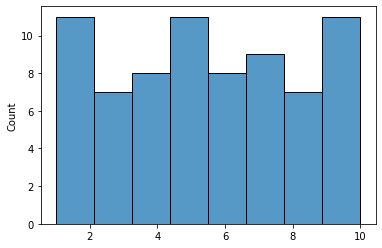

In [ ]:
percentiles(serie_1)

Valor del percentil 0.0: 1.0
Valor del percentil 12.0: 3.76
Valor del percentil 25.0: 6.0
Valor del percentil 38.0: 7.0
Valor del percentil 50.0: 7.0
Valor del percentil 62.0: 8.0
Valor del percentil 75.0: 8.0
Valor del percentil 88.0: 9.0
Valor del percentil 100.0: 10.0


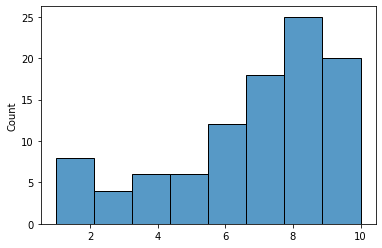

In [ ]:
percentiles(serie_2)

Valor del percentil 0.0: 1.0
Valor del percentil 12.0: 4.0
Valor del percentil 25.0: 5.0
Valor del percentil 38.0: 5.0
Valor del percentil 50.0: 5.0
Valor del percentil 62.0: 6.0
Valor del percentil 75.0: 6.0
Valor del percentil 88.0: 7.0
Valor del percentil 100.0: 10.0


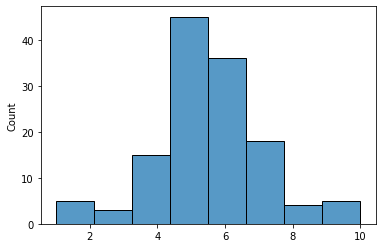

In [ ]:
percentiles(serie_3)

Valor del percentil 0.0: 1.0
Valor del percentil 12.0: 2.0
Valor del percentil 25.0: 2.5
Valor del percentil 38.0: 3.0
Valor del percentil 50.0: 3.0
Valor del percentil 62.0: 4.0
Valor del percentil 75.0: 5.0
Valor del percentil 88.0: 7.239999999999995
Valor del percentil 100.0: 10.0


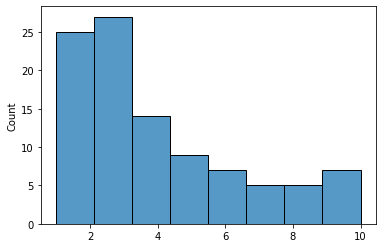

In [ ]:
percentiles(serie_4)

b) Percentiles para evaluar nuestro dataset de meteoritos

Ahora vamos a aplicar los percentiles a nuestro dataset de objetos que han orbitado cerca de la Tierra. Queremos entender cómo están organizados nuestros datos.

En el Reto pasado, usamos la desviación estándar para obtener la "desviación esperada" de nuestros datos. Aprendimos que la mayoría de nuestros datos están a una distancia de 1 desviación estándar o menos del promedio. Entre más desviaciones estándares añadíamos, menos datos quedaban fuera de nuestros subconjuntos. Lo que no sabemos es dónde están concentrados nuestros datos.

Piensa en lo siguiente:

Si tenemos un dataset con rango de 1 a 10, y nuestra desviación estándar es 2.5, los datos pueden estar organizados de maneras muy distintas:

- Podría ser que el promedio es 3 y que la mayoría de los datos están en el rango de 0.5 a 5.5. En este caso podría haber datos muy distintos al resto en el parte superior del rango total (los valores entre 5.5 y 10).
- Podría ser que el promedio es 7 y que la mayoría de los datos están en el rango de 4.5 a 9.5. En este caso los datos atípicos estarían concentrados en la parte inferior del rango total.
- Podría ser que el promedio es 5 y que la mayoría de los datos están concentrados en el rango de 2.5 a 7.5. En este caso, lo más normal es que los datos estén alrededor del valor que está justo a la mitad del rango total y es cada vez más raro encontrar datos muy pequeños o muy grandes.

Hay muchas otras posibilidades, pero lo importante es darse cuenta de que saber solamente la desviación estándar nos da aún una descripción muy ambigua de nuestros datos. Saber el promedio ya es un primer indicador de lo que está pasando en realidad. Pero saber además los percentiles nos puede dar una idea muchísimo más clara de cómo están acomodados nuestros datos.

Lee el dataset 'near_earth_objects-jan_feb_1995-clean.csv' y obtén percentiles de la columna 'estimated_diameter.meters.estimated_diameter_max'. Comenta con tus compañeros y con la experta tus hallazgos y tus hipótesis acerca de qué podemos aprender sobre la organización de nuestros datos usando los percentiles.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/Remoto near_earth_objects-jan_feb_1995-clean.csv', index_col=0)
df.head()

,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


In [ ]:
mean = df['estimated_diameter.meters.estimated_diameter_max'].mean()    # Media de las muestras
mean

410.0860422397653

In [ ]:
std = df['estimated_diameter.meters.estimated_diameter_max'].std()    # Desviasion de la muestra
std

614.691591855223

In [ ]:
diametro = 'estimated_diameter.meters.estimated_diameter_max'

Valor del percentil 0.0: 2.978790628
Valor del percentil 12.0: 32.426586113831995
Valor del percentil 25.0: 62.2357573367
Valor del percentil 38.0: 118.58779085769999
Valor del percentil 50.0: 215.7943048444
Valor del percentil 62.0: 326.6178974458
Valor del percentil 75.0: 517.6544821978
Valor del percentil 88.0: 826.613550698137
Valor del percentil 100.0: 6516.883821679


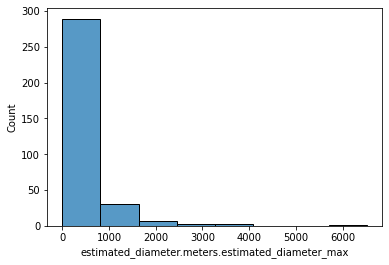

In [ ]:
percentiles(df[diametro])